In [49]:
import numpy as np
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
pwd

'/Users/sheenaschier/Documents/Workdir'

#### Load previously saved random forest model

In [45]:
with open('CA_gradrate_model.pkl', 'rb') as f:
    model = pkl.load(f)
model

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

#### Load cleaned and augmented dataset

In [34]:
df = pd.read_csv('Gradrates/datasets/cleaned_CA_enr_grd.csv')
df.describe()

,GRADRATE,whi_f_ratio,whi_m_ratio,afr_f_ratio,afr_m_ratio,his_f_ratio,his_m_ratio,asi_f_ratio,asi_m_ratio,nat_f_ratio,nat_m_ratio,pac_f_ratio,pac_m_ratio,fil_f_ratio,fil_m_ratio,not_f_ratio,not_m_ratio,mul_f_ratio,mul_m_ratio
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,73.444534,0.151930,0.180634,0.037075,0.043369,0.218125,0.254896,0.009072,0.010643,0.024066,0.027796,0.002815,0.003671,0.007866,0.009485,0.008434,0.010124,0.006844,0.007992
std,24.034843,0.134179,0.147571,0.057085,0.067652,0.143123,0.164676,0.030025,0.037149,0.046347,0.050050,0.005632,0.014475,0.016328,0.019208,0.037962,0.045990,0.015363,0.019929
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.300000,0.033291,0.050000,0.003800,0.005259,0.101204,0.115630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,82.300000,0.117262,0.147884,0.015504,0.019183,0.201911,0.237486,0.001788,0.002222,0.007804,0.010013,0.000559,0.000835,0.002436,0.003252,0.000000,0.000000,0.000386,0.000607
75%,92.700000,0.251727,0.289214,0.046616,0.053047,0.317907,0.379686,0.005705,0.006462,0.025000,0.030861,0.003434,0.003829,0.009354,0.011037,0.002812,0.003962,0.007011,0.007905
max,99.800000,0.800000,0.800000,0.535211,0.821429,1.000000,1.000000,0.500000,0.666667,0.388344,0.440075,0.090909,0.500000,0.206304,0.244126,0.465969,0.909091,0.267782,0.333333


#### Separate target variable y and input features X

In [35]:
y = df.GRADRATE
X = df.drop('GRADRATE', axis=1)
print(X)

      whi_f_ratio  whi_m_ratio  afr_f_ratio  afr_m_ratio  his_f_ratio  \
0        0.271022     0.236970     0.046560     0.054899     0.074357   
1        0.024291     0.028340     0.348178     0.323887     0.089069   
2        0.016260     0.060976     0.089431     0.434959     0.024390   
3        0.025000     0.120000     0.070000     0.170000     0.125000   
4        0.000000     0.000000     0.213483     0.000000     0.595506   
5        0.108108     0.135135     0.081081     0.135135     0.081081   
6        0.185591     0.175411     0.043853     0.045419     0.000783   
7        0.186182     0.170289     0.143691     0.137853     0.100876   
8        0.008696     0.034783     0.313043     0.304348     0.113043   
9        0.209302     0.232558     0.038760     0.062016     0.178295   
10       0.208542     0.209696     0.029242     0.032705     0.109658   
11       0.138889     0.333333     0.027778     0.055556     0.111111   
12       0.014837     0.026706     0.332344     0.3

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=1234)
print( len(X_train), len(X_test), len(y_train), len(y_test))

1580 396 1580 396


In [46]:
pred = model.predict(X_test)

print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))
print( 'RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

R^2: 0.436293538704
MAE: 12.7332413173
RMSE: 17.2177301179


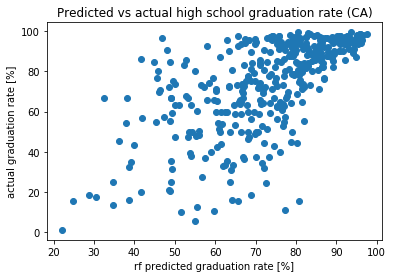

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


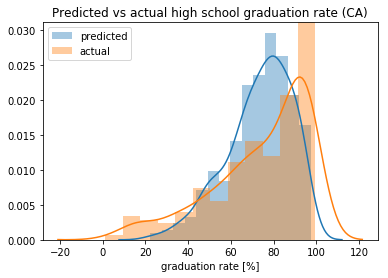

In [50]:
plt.scatter(pred, y_test)
plt.xlabel('rf predicted graduation rate [%]')
plt.ylabel('actual graduation rate [%]')
plt.title('Predicted vs actual high school graduation rate (CA)')
plt.show()
sns.distplot(pred, label= "predicted")
sns.distplot(y_test, label= "actual")
plt.xlabel('graduation rate [%]')
plt.title('Predicted vs actual high school graduation rate (CA)')
plt.legend()
plt.show()

In [101]:
def clean_and_augment_data(df):
    female = df['GENDER'] == 'F'
    male = df['GENDER'] == 'M'
    ethnic_not_reported = df['ETHNIC'] == 0
    ethnic_asian = df['ETHNIC'] == 1
    ethnic_native = df['ETHNIC'] == 2
    ethnic_pacific_islander = df['ETHNIC'] == 3
    ethnic_filipino = df['ETHNIC'] == 4
    ethnic_hispanic = df['ETHNIC'] == 5
    ethnic_african_american = df['ETHNIC'] == 6
    ethnic_white = df['ETHNIC'] == 7
    ethnic_multi = df['ETHNIC'] == 9
    
    df_female_not = df[(female) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_not = df[(male) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_female_asi = df[(female) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_asi = df[(male) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_female_nat = df[(female) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_nat = df[(male) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_female_pac = df[(female) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_pac = df[(male) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_female_fil = df[(female) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_fil = df[(male) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_female_his = df[(female) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_his = df[(male) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])   
    df_female_afr = df[(female) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_afr = df[(male) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_female_whi = df[(female) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_whi = df[(male) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])     
    df_female_mul = df[(female) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
    df_male_mul = df[(male) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])  

    not_join = pd.merge(df_female_not, df_male_not, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_not', '_m_not'))
    asi_join = pd.merge(df_female_asi, df_male_asi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_asi', '_m_asi'))
    nat_join = pd.merge(df_female_nat, df_male_nat, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_nat', '_m_nat'))
    pac_join = pd.merge(df_female_pac, df_male_pac, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_pac', '_m_pac'))
    fil_join = pd.merge(df_female_fil, df_male_fil, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_fil', '_m_fil'))
    his_join = pd.merge(df_female_his, df_male_his, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_his', '_m_his'))
    afr_join = pd.merge(df_female_afr, df_male_afr, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_afr', '_m_afr'))
    whi_join = pd.merge(df_female_whi, df_male_whi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_whi', '_m_whi'))
    mul_join = pd.merge(df_female_mul, df_male_mul, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_mul', '_m_mul'))

    join_1 = pd.merge(not_join, asi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')   
    join_2 = pd.merge(join_1, nat_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
    join_3 = pd.merge(join_2, pac_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
    join_4 = pd.merge(join_3, fil_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
    join_5 = pd.merge(join_4, his_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
    join_6 = pd.merge(join_5, afr_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
    join_7 = pd.merge(join_6, whi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
    join_8 = pd.merge(join_7, mul_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')    
    
    #rate_join = pd.merge(df_gdrate, join_8, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
    
    df = join_8.fillna(value=0)
    df['enr_afr'] = df.ENR_TOTAL_f_afr+df.ENR_TOTAL_m_afr
    df['enr_asi'] = df.ENR_TOTAL_f_asi+df.ENR_TOTAL_m_asi
    df['enr_fil'] = df.ENR_TOTAL_f_fil+df.ENR_TOTAL_m_fil
    df['enr_his'] = df.ENR_TOTAL_f_his+df.ENR_TOTAL_m_his
    df['enr_mul'] = df.ENR_TOTAL_f_mul+df.ENR_TOTAL_m_mul
    df['enr_nat'] = df.ENR_TOTAL_f_nat+df.ENR_TOTAL_m_nat
    df['enr_not'] = df.ENR_TOTAL_f_not+df.ENR_TOTAL_m_not
    df['enr_pac'] = df.ENR_TOTAL_f_pac+df.ENR_TOTAL_m_pac
    df['enr_whi'] = df.ENR_TOTAL_f_whi+df.ENR_TOTAL_m_whi
    df['enr_tot'] = df.enr_afr+df.enr_asi+df.enr_fil+df.enr_his+df.enr_nat+df.enr_not+df.enr_pac+df.enr_whi
    
    df['afr_f_ratio'] = df.ENR_TOTAL_f_afr/df.enr_tot
    df['afr_m_ratio'] = df.ENR_TOTAL_m_afr/df.enr_tot
    df['asi_f_ratio'] = df.ENR_TOTAL_f_asi/df.enr_tot
    df['asi_m_ratio'] = df.ENR_TOTAL_m_asi/df.enr_tot
    df['fil_f_ratio'] = df.ENR_TOTAL_f_fil/df.enr_tot
    df['fil_m_ratio'] = df.ENR_TOTAL_m_fil/df.enr_tot
    df['his_f_ratio'] = df.ENR_TOTAL_f_his/df.enr_tot
    df['his_m_ratio'] = df.ENR_TOTAL_m_his/df.enr_tot
    df['nat_f_ratio'] = df.ENR_TOTAL_f_nat/df.enr_tot
    df['nat_m_ratio'] = df.ENR_TOTAL_m_nat/df.enr_tot
    df['not_f_ratio'] = df.ENR_TOTAL_f_not/df.enr_tot
    df['not_m_ratio'] = df.ENR_TOTAL_m_not/df.enr_tot
    df['pac_f_ratio'] = df.ENR_TOTAL_f_pac/df.enr_tot
    df['pac_m_ratio'] = df.ENR_TOTAL_m_pac/df.enr_tot
    df['whi_f_ratio'] = df.ENR_TOTAL_f_whi/df.enr_tot
    df['whi_m_ratio'] = df.ENR_TOTAL_m_whi/df.enr_tot
    df['mul_f_ratio'] = df.ENR_TOTAL_f_mul/df.enr_tot
    df['mul_m_ratio'] = df.ENR_TOTAL_m_mul/df.enr_tot
    highschool_asi = (df['GR_9_f_asi']+df['GR_10_f_asi']+df['GR_11_f_asi']+df['GR_12_f_asi']+df['GR_9_m_asi']+df['GR_10_m_asi']+df['GR_11_m_asi']+df['GR_12_m_asi'])
    highschool_afr = (df['GR_9_f_afr']+df['GR_10_f_afr']+df['GR_11_f_afr']+df['GR_12_f_afr']+df['GR_9_m_afr']+df['GR_10_m_afr']+df['GR_11_m_afr']+df['GR_12_m_afr'])
    highschool_fil = (df['GR_9_f_fil']+df['GR_10_f_fil']+df['GR_11_f_fil']+df['GR_12_f_fil']+df['GR_9_m_fil']+df['GR_10_m_fil']+df['GR_11_m_fil']+df['GR_12_m_fil'])
    highschool_his = (df['GR_9_f_his']+df['GR_10_f_his']+df['GR_11_f_his']+df['GR_12_f_his']+df['GR_9_m_his']+df['GR_10_m_his']+df['GR_11_m_his']+df['GR_12_m_his'])
    highschool_nat = (df['GR_9_f_nat']+df['GR_10_f_nat']+df['GR_11_f_nat']+df['GR_12_f_nat']+df['GR_9_m_nat']+df['GR_10_m_nat']+df['GR_11_m_nat']+df['GR_12_m_nat'])
    highschool_not = (df['GR_9_f_not']+df['GR_10_f_not']+df['GR_11_f_not']+df['GR_12_f_not']+df['GR_9_m_not']+df['GR_10_m_not']+df['GR_11_m_not']+df['GR_12_m_not'])
    highschool_pac = (df['GR_9_f_pac']+df['GR_10_f_pac']+df['GR_11_f_pac']+df['GR_12_f_pac']+df['GR_9_m_pac']+df['GR_10_m_pac']+df['GR_11_m_pac']+df['GR_12_m_pac'])
    highschool_whi = (df['GR_9_f_whi']+df['GR_10_f_whi']+df['GR_11_f_whi']+df['GR_12_f_whi']+df['GR_9_m_whi']+df['GR_10_m_whi']+df['GR_11_m_whi']+df['GR_12_m_whi'])
    highschool_mul = (df['GR_9_f_mul']+df['GR_10_f_mul']+df['GR_11_f_mul']+df['GR_12_f_mul']+df['GR_9_m_mul']+df['GR_10_m_mul']+df['GR_11_m_mul']+df['GR_12_m_mul'])

    highschool_mask = (((highschool_asi+highschool_afr+highschool_fil+highschool_his+highschool_nat+highschool_not+highschool_pac+highschool_whi+highschool_mul) >0.0)&(df['SCHOOL'] !='District Total')&(df['SCHOOL'] !='State Total')&(df['SCHOOL'] !='County Total'))
    df['highschool'] = (highschool_mask)
    df = df[df.highschool]
    df = df[['whi_f_ratio', 'whi_m_ratio', 'afr_f_ratio', 'afr_m_ratio', 'his_f_ratio', 'his_m_ratio', 'asi_f_ratio', 'asi_m_ratio', 'nat_f_ratio', 'nat_m_ratio', 'pac_f_ratio', 'pac_m_ratio', 'fil_f_ratio', 'fil_m_ratio', 'not_f_ratio', 'not_m_ratio', 'mul_f_ratio', 'mul_m_ratio']]
    #df = df[['SCHOOL', 'whi_f_ratio', 'whi_m_ratio', 'afr_f_ratio', 'afr_m_ratio', 'his_f_ratio', 'his_m_ratio', 'asi_f_ratio', 'asi_m_ratio', 'nat_f_ratio', 'nat_m_ratio', 'pac_f_ratio', 'pac_m_ratio', 'fil_f_ratio', 'fil_m_ratio', 'not_f_ratio', 'not_m_ratio', 'mul_f_ratio', 'mul_m_ratio']]
    df = df.fillna(value=0)
    
    return df

In [102]:
new_table = pd.read_table('/Users/sheenaschier/Documents/Workdir/Gradrates/datasets/filesenr.1617.txt')
new_table.describe()

,CDS_CODE,ETHNIC,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
count,1.298130e+05,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000,129813.000000
mean,2.955201e+13,4.687936,4.124233,3.512761,3.432268,3.583347,3.629382,3.755348,3.665342,3.648125,3.638619,0.002904,3.755772,3.744502,3.709343,3.729742,0.046829,47.978515,0.008135
std,1.397843e+13,2.634486,10.581776,8.957445,8.735392,9.165973,9.306443,9.625229,13.393706,17.005342,16.921971,0.163823,21.250980,20.871486,19.935806,19.112925,0.877238,103.942299,0.394273
min,1.100170e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.964733e+13,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,3.166830e+13,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,3.776471e+13,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000
max,5.872770e+13,9.000000,182.000000,306.000000,125.000000,143.000000,161.000000,171.000000,342.000000,373.000000,363.000000,38.000000,567.000000,537.000000,620.000000,490.000000,77.000000,2127.000000,66.000000


In [103]:
df = clean_and_augment_data(new_table)
#print(df.SCHOOL)

In [105]:
correlations = df.corr()

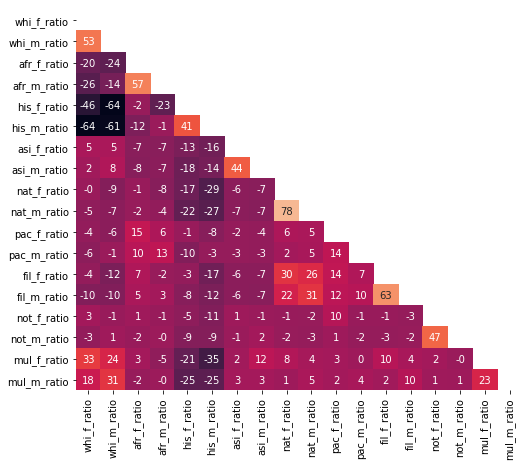

In [108]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,7))

corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)

In [110]:
pred = model.predict(df)
print(pred)

[ 93.5232      78.151       56.8613     ...,  55.87812167  55.87812167
  55.87812167]


In [115]:
class GradratesModel:
    
    def __init__(self, model_dir):
        with open(model_dir, 'rb') as f:
            self.model = pkl.load(f)
    
    def predict_gradrate(self, data, clean_and_augment=True):
        if clean_and_augment:
            df = clean_and_augment_data(data)
        return df, self.model.predict(df)
    
    def clean_and_augment_data(df):
        female = df['GENDER'] == 'F'
        male = df['GENDER'] == 'M'
        ethnic_not_reported = df['ETHNIC'] == 0
        ethnic_asian = df['ETHNIC'] == 1
        ethnic_native = df['ETHNIC'] == 2
        ethnic_pacific_islander = df['ETHNIC'] == 3
        ethnic_filipino = df['ETHNIC'] == 4
        ethnic_hispanic = df['ETHNIC'] == 5
        ethnic_african_american = df['ETHNIC'] == 6
        ethnic_white = df['ETHNIC'] == 7
        ethnic_multi = df['ETHNIC'] == 9
        
        df_female_not = df[(female) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_not = df[(male) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_female_asi = df[(female) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_asi = df[(male) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_female_nat = df[(female) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_nat = df[(male) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_female_pac = df[(female) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_pac = df[(male) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_female_fil = df[(female) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_fil = df[(male) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_female_his = df[(female) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_his = df[(male) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])   
        df_female_afr = df[(female) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_afr = df[(male) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_female_whi = df[(female) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_whi = df[(male) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])     
        df_female_mul = df[(female) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])
        df_male_mul = df[(male) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'ADULT'])  
        
        not_join = pd.merge(df_female_not, df_male_not, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_not', '_m_not'))
        asi_join = pd.merge(df_female_asi, df_male_asi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_asi', '_m_asi'))
        nat_join = pd.merge(df_female_nat, df_male_nat, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_nat', '_m_nat'))
        pac_join = pd.merge(df_female_pac, df_male_pac, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_pac', '_m_pac'))
        fil_join = pd.merge(df_female_fil, df_male_fil, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_fil', '_m_fil'))
        his_join = pd.merge(df_female_his, df_male_his, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_his', '_m_his'))
        afr_join = pd.merge(df_female_afr, df_male_afr, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_afr', '_m_afr'))
        whi_join = pd.merge(df_female_whi, df_male_whi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_whi', '_m_whi'))
        mul_join = pd.merge(df_female_mul, df_male_mul, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_mul', '_m_mul'))
        
        join_1 = pd.merge(not_join, asi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')   
        join_2 = pd.merge(join_1, nat_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
        join_3 = pd.merge(join_2, pac_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
        join_4 = pd.merge(join_3, fil_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
        join_5 = pd.merge(join_4, his_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
        join_6 = pd.merge(join_5, afr_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
        join_7 = pd.merge(join_6, whi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
        join_8 = pd.merge(join_7, mul_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')    
            
        df = join_8.fillna(value=0)
        df['enr_afr'] = df.ENR_TOTAL_f_afr+df.ENR_TOTAL_m_afr
        df['enr_asi'] = df.ENR_TOTAL_f_asi+df.ENR_TOTAL_m_asi
        df['enr_fil'] = df.ENR_TOTAL_f_fil+df.ENR_TOTAL_m_fil
        df['enr_his'] = df.ENR_TOTAL_f_his+df.ENR_TOTAL_m_his
        df['enr_mul'] = df.ENR_TOTAL_f_mul+df.ENR_TOTAL_m_mul
        df['enr_nat'] = df.ENR_TOTAL_f_nat+df.ENR_TOTAL_m_nat
        df['enr_not'] = df.ENR_TOTAL_f_not+df.ENR_TOTAL_m_not
        df['enr_pac'] = df.ENR_TOTAL_f_pac+df.ENR_TOTAL_m_pac
        df['enr_whi'] = df.ENR_TOTAL_f_whi+df.ENR_TOTAL_m_whi
        df['enr_tot'] = df.enr_afr+df.enr_asi+df.enr_fil+df.enr_his+df.enr_nat+df.enr_not+df.enr_pac+df.enr_whi
        
        df['afr_f_ratio'] = df.ENR_TOTAL_f_afr/df.enr_tot
        df['afr_m_ratio'] = df.ENR_TOTAL_m_afr/df.enr_tot
        df['asi_f_ratio'] = df.ENR_TOTAL_f_asi/df.enr_tot
        df['asi_m_ratio'] = df.ENR_TOTAL_m_asi/df.enr_tot
        df['fil_f_ratio'] = df.ENR_TOTAL_f_fil/df.enr_tot
        df['fil_m_ratio'] = df.ENR_TOTAL_m_fil/df.enr_tot
        df['his_f_ratio'] = df.ENR_TOTAL_f_his/df.enr_tot
        df['his_m_ratio'] = df.ENR_TOTAL_m_his/df.enr_tot
        df['nat_f_ratio'] = df.ENR_TOTAL_f_nat/df.enr_tot
        df['nat_m_ratio'] = df.ENR_TOTAL_m_nat/df.enr_tot
        df['not_f_ratio'] = df.ENR_TOTAL_f_not/df.enr_tot
        df['not_m_ratio'] = df.ENR_TOTAL_m_not/df.enr_tot
        df['pac_f_ratio'] = df.ENR_TOTAL_f_pac/df.enr_tot
        df['pac_m_ratio'] = df.ENR_TOTAL_m_pac/df.enr_tot
        df['whi_f_ratio'] = df.ENR_TOTAL_f_whi/df.enr_tot
        df['whi_m_ratio'] = df.ENR_TOTAL_m_whi/df.enr_tot
        df['mul_f_ratio'] = df.ENR_TOTAL_f_mul/df.enr_tot
        df['mul_m_ratio'] = df.ENR_TOTAL_m_mul/df.enr_tot
        highschool_asi = (df['GR_9_f_asi']+df['GR_10_f_asi']+df['GR_11_f_asi']+df['GR_12_f_asi']+df['GR_9_m_asi']+df['GR_10_m_asi']+df['GR_11_m_asi']+df['GR_12_m_asi'])
        highschool_afr = (df['GR_9_f_afr']+df['GR_10_f_afr']+df['GR_11_f_afr']+df['GR_12_f_afr']+df['GR_9_m_afr']+df['GR_10_m_afr']+df['GR_11_m_afr']+df['GR_12_m_afr'])
        highschool_fil = (df['GR_9_f_fil']+df['GR_10_f_fil']+df['GR_11_f_fil']+df['GR_12_f_fil']+df['GR_9_m_fil']+df['GR_10_m_fil']+df['GR_11_m_fil']+df['GR_12_m_fil'])
        highschool_his = (df['GR_9_f_his']+df['GR_10_f_his']+df['GR_11_f_his']+df['GR_12_f_his']+df['GR_9_m_his']+df['GR_10_m_his']+df['GR_11_m_his']+df['GR_12_m_his'])
        highschool_nat = (df['GR_9_f_nat']+df['GR_10_f_nat']+df['GR_11_f_nat']+df['GR_12_f_nat']+df['GR_9_m_nat']+df['GR_10_m_nat']+df['GR_11_m_nat']+df['GR_12_m_nat'])
        highschool_not = (df['GR_9_f_not']+df['GR_10_f_not']+df['GR_11_f_not']+df['GR_12_f_not']+df['GR_9_m_not']+df['GR_10_m_not']+df['GR_11_m_not']+df['GR_12_m_not'])
        highschool_pac = (df['GR_9_f_pac']+df['GR_10_f_pac']+df['GR_11_f_pac']+df['GR_12_f_pac']+df['GR_9_m_pac']+df['GR_10_m_pac']+df['GR_11_m_pac']+df['GR_12_m_pac'])
        highschool_whi = (df['GR_9_f_whi']+df['GR_10_f_whi']+df['GR_11_f_whi']+df['GR_12_f_whi']+df['GR_9_m_whi']+df['GR_10_m_whi']+df['GR_11_m_whi']+df['GR_12_m_whi'])
        highschool_mul = (df['GR_9_f_mul']+df['GR_10_f_mul']+df['GR_11_f_mul']+df['GR_12_f_mul']+df['GR_9_m_mul']+df['GR_10_m_mul']+df['GR_11_m_mul']+df['GR_12_m_mul'])
        
        highschool_mask = (((highschool_asi+highschool_afr+highschool_fil+highschool_his+highschool_nat+highschool_not+highschool_pac+highschool_whi+highschool_mul) >0.0)&(df['SCHOOL'] !='District Total')&(df['SCHOOL'] !='State Total')&(df['SCHOOL'] !='County Total'))
        df['highschool'] = (highschool_mask)
        df = df[df.highschool]
        df = df[['whi_f_ratio', 'whi_m_ratio', 'afr_f_ratio', 'afr_m_ratio', 'his_f_ratio', 'his_m_ratio', 'asi_f_ratio', 'asi_m_ratio', 'nat_f_ratio', 'nat_m_ratio', 'pac_f_ratio', 'pac_m_ratio', 'fil_f_ratio', 'fil_m_ratio', 'not_f_ratio', 'not_m_ratio', 'mul_f_ratio', 'mul_m_ratio']]
        df = df.fillna(value=0)
        
        return df